# 1 Corpus beschaffen importieren
In einem ersten Schritt wollen wir das Scraping Modul `create_record.py` importieren. Die Moduldatei hierfür sollte sich im gleichen Verzeichnis wie dieses Notebook befinden. Hiermit können wir auf die Tafsire, die auf der Seite al-tafsir.com verfügbar, zugreifen und den Text extrahieren. Damit wir die Daten, die später zu unserem Corpus werden sollen, vernünftig Zwischenspeichern können, möchten wir in einem zweiten Schritt eine leere Pandas-Serie mit dem Namen `corpus` erzeugen.
##### Aufgabe 1.1 (Modulimport, pd.Series)  


In [2]:
import create_record
import pandas as pd

corpus = pd.Series({}, dtype="object")

Da wir das Modul `create_record` noch überhaupt gar nicht kennen, schadet es nicht, einen kurzen Blick auf dessen Dokumentation zu werfen.

##### Aufgabe 1.2 (Hilfsfunktion) Rufen Sie mit Hilfe der Funktion `help()` die modulinterne Dokumentation auf und identifizieren Sie die Funktion, die uns den Text einer beliebigen Aya einer Sure aus einem beliebigen liefert!

In [ ]:
#help(cr)#

Nun da wir wissen, welche Funktion wir benötigen, rufen Sie diese mit den für Ihre Gruppe relevanten Parametern auf speichern Sie das Ergebnis des Funktionsaufrufes (also den arabischen Text) in der noch leeren Serie 
`corpus` unter dem key `Text` ab (Beispiel: `corpus["Schlüssel"]`)
##### Aufgabe 1.3a (Funktionsaufruf, pd.Series)  

In [ ]:
#corpus["Text"] = create_record.collect_data(1,1,7)#

Sollte es Probleme beim Scrapen geben, kann alternativ die betreffende Datei geladen werden (Gruppe B: `1_1_7.txt`, Gruppe B: `1_2_7.txt`).

Aufgabe 1.3b  
Laden Sie den Text aus der für Sie relevanten Datei und speichern Sie ihn analog zu wie ihn Aufgabe 1.3 beschrieben. Beachten Sie, dass hierbei das korrekte Encoding gewählt werden muss, um eine korrekte Darstellung der arabischen Zeichen funktioniert.

In [3]:
import pandas as pd
with open("./assets/1_1_7_Text.txt", "r", encoding="utf-8") as f:
    corpus["Text"] = f.read()

Nun können wir uns als erstes ein mal den Text ansehen, den wir als Ergebnis unseres Scrapingvorgangs erhalten habe:

In [4]:
corpus["Text"]

'وقوله: { صِرَاطَ الذينَ أنْعَمْتَ عَلَـيْهِمْ صِرَاطَ ٱلَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْرِ ٱلْمَغْضُوبِ عَلَيْهِم وَلاَ ٱلضَّآلِّينَ } إبـانة عن الصراط الـمستقـيـم أيّ الصراط هو، إذ كان كل طريق من طرق الـحقّ صراطاً مستقـيـماً، فقـيـل لـمـحمد صلى الله عليه وسلم: قل يا مـحمد: اهدنا يا ربنا الصراط الـمستقـيـم، صراط الذين أنعمت علـيهم، بطاعتك وعبـادتك من ملائكتك، وأنبـيائك، والصديقـين، والشهداء، والصالـحين. وذلك نظير ما قال ربنا جل ثناؤه فـي تنزيـله:{\xa0وَلَوْ أَنَّهُمْ فَعَلُواْ مَا يُوعَظُونَ بِهِ لَكَانَ خَيْراً لَّهُمْ وَأَشَدَّ تَثْبِيتاً * وَإِذاً لأَتَيْنَٰهُم مِّن لَّدُنَّـآ أَجْراً عَظِيماً * وَلَهَدَيْنَاهُمْ صِرَاطاً مُّسْتَقِيماً * وَمَن يُطِعِ ٱللَّهَ وَٱلرَّسُولَ فَأُوْلَـٰئِكَ مَعَ ٱلَّذِينَ أَنْعَمَ ٱللَّهُ عَلَيْهِم مِّنَ ٱلنَّبِيِّينَ وَٱلصِّدِّيقِينَ وَٱلشُّهَدَآءِ وَٱلصَّالِحِينَ\xa0} [النساء: 66-69] قال أبو جعفر: فـالذي أمر مـحمد صلى الله عليه وسلم وأمته أن يسألوه ربهم من الهداية للطريق الـمستقـيـم، هي الهداية للطريق الذي وصف الله جل ثناؤه صفته. وذلك الطريق هو طريق

____
# 2 Preprocessing
## 2.1 Normalizing data

In [5]:
from camel_tools.utils.normalize import normalize_unicode
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.dediac import dediac_ar


# def remove_citations(text):
#     import re
#     text_without_citations = re.sub("([\[\{]).*?([\]\}])", "", text)
    
#     return text_without_citations

def reduce_to_archarset(text):
    import re
    # Remove non-arabic characters
    nonarab_chars = '[^\u0621-\u064A ]'
    text = re.sub(nonarab_chars, '', text)
    return text

## normalize
def normalizer(string):
    string = normalize_unicode(string)
    string_normalized = normalize_alef_ar(string)
    string_normalized = normalize_alef_maksura_ar(string_normalized)
    string_normalized = normalize_teh_marbuta_ar(string_normalized)
    
    # remove diacritica
    string_normalized = dediac_ar(string_normalized)
    
    #reduce to arabic charset
    string_normalized = reduce_to_archarset(string_normalized)
    return string_normalized

corpus["TextNormalized"] = normalizer(corpus["Text"])

In [6]:
corpus["TextNormalized"]

'وقوله  صراط الذين انعمت عليهم صراط الذين انعمت عليهم غير المغضوب عليهم ولا الضالين  ابانه عن الصراط المستقيم اي الصراط هو اذ كان كل طريق من طرق الحق صراطا مستقيما فقيل لمحمد صلي الله عليه وسلم قل يا محمد اهدنا يا ربنا الصراط المستقيم صراط الذين انعمت عليهم بطاعتك وعبادتك من ملائكتك وانبيائك والصديقين والشهداء والصالحين وذلك نظير ما قال ربنا جل ثناؤه في تنزيله ولو انهم فعلوا ما يوعظون به لكان خيرا لهم واشد تثبيتا  واذا لاتينهم من لدنا اجرا عظيما  ولهديناهم صراطا مستقيما  ومن يطع الله والرسول فاولئك مع الذين انعم الله عليهم من النبيين والصديقين والشهداء والصالحين  النساء  قال ابو جعفر فالذي امر محمد صلي الله عليه وسلم وامته ان يسالوه ربهم من الهدايه للطريق المستقيم هي الهدايه للطريق الذي وصف الله جل ثناؤه صفته وذلك الطريق هو طريق الذين وصفهم الله بما وصفهم به في تنزيله ووعد من سلكه فاستقام فيه طائعا لله ولرسوله صلي الله عليه وسلم ان يورده مواردهم والله لا يخلف الميعاد وبنحو ما قلنا في ذلك روي الخبر عن ابن عباس وغيره حدثنا محمد بن العلاء قال حدثنا عثمان بن سعيد قال حدثنا بشر بن عمار قال 

## 2.2 Tokenization

### 2.2.1 Simple Tokenization
Will tokenize words by splitting the string on whitespace and punctuation.

In [7]:
from camel_tools.tokenizers.word import simple_word_tokenize

corpus["Tokenized"] = simple_word_tokenize(corpus["TextNormalized"])

### 2.2.2 Morphological tokenization
The morphological tokenizer expects pre-tokenized text in a list. Therefore run simple_word_tokenize(string) first

In [8]:
from camel_tools.disambig.mle import MLEDisambiguator
from camel_tools.tokenizers.morphological import MorphologicalTokenizer


# Load a pretrained disambiguator to use with a tokenizer
mle = MLEDisambiguator.pretrained('calima-msa-r13')

# `split=True`: morphological tokens are output as seperate strings.
tokenizer = MorphologicalTokenizer(mle, scheme='d3tok', split=True)
corpus["TokenizedMorph"] = tokenizer.tokenize(corpus["Tokenized"])

# Rausfiltern unselbständiger Morpheme
corpus["TokenizedMorph"] = [token for token in corpus["TokenizedMorph"] if not '+' in token]

In [ ]:
corpus["TokenizedMorph"]

## [2.3 Remove stopwords from token list]
normalization needs to implemented for stoplist, before usable

In [9]:
def stopwords(token_list, stopwords_list, morph=True):

    token_list_filtered = []
    words_removed = []
    with open (stopwords_list, encoding="UTF-8") as stopwords:
        if morph == True:
            x = stopwords.read()
        else:
            x = normalizer(stopwords.read())
        for token in token_list:
            if token not in x:
                token_list_filtered.append(token)
            if token in x:
                words_removed.append(token)

    return token_list_filtered, words_removed

In [10]:
corpus["TokenizedMorphStopword"] = stopwords(corpus["TokenizedMorph"], 'C:/Users/anaconda/Desktop/arabic-stop-words-master/list2.txt')[0]
corpus["TokenizedStopword"] = stopwords(corpus["Tokenized"], 'C:/Users/anaconda/Desktop/arabic-stop-words-master/list2.txt', morph=False)[0]


MLEDisambiguator

In [39]:
from camel_tools.disambig.mle import MLEDisambiguator

# instantiate the Maximum Likelihood Disambiguator
mle = MLEDisambiguator.pretrained()

# The disambiguator expects pre-tokenized text
sentence = corpus["TokenizedStopword"]

disambig = mle.disambiguate(sentence)

diacritized = [d.analyses[0].analysis['diac'] for d in disambig]
pos_tags = [d.analyses[0].analysis['pos'] for d in disambig]
lemmas = [d.analyses[0].analysis['lex'] for d in disambig]
gloss = [d.analyses[0].analysis['gloss'] for d in disambig]


# Print the combined feature values extracted above
for triplet in zip(diacritized, pos_tags, gloss):
    print(triplet)

('وَقَوْلِهِ', 'noun', 'and+statement;remark+its;his')
('صِراط', 'noun', 'way;path')
('أَنْعَمْتُ', 'verb', 'make_pleasant;bestow_favors+I_<verb>')
('صِراط', 'noun', 'way;path')
('أَنْعَمْتُ', 'verb', 'make_pleasant;bestow_favors+I_<verb>')
('المَغْضُوب', 'adj', 'the+angered')
('الضالَّيْنِ', 'noun', 'the+erroneous;misguided+two')
('الصِراط', 'noun', 'the+way;path')
('المُسْتَقِيم', 'noun', 'the+straight;correct;righteous')
('الصِراط', 'noun', 'the+way;path')
('طَرِيقِ', 'noun', 'road;way+[def.gen.]')
('طُرُقٍ', 'noun', 'roads;ways+[indef.gen.]')
('الحَقَّ', 'noun', 'the+truth;right+[def.acc.]')
('صِراطاً', 'noun', 'way;path+[acc.indef.]')
('مُسْتَقِيماً', 'noun', 'straight;correct;righteous+[acc.indef.]')
('فَقِيلَ', 'verb', 'and;so+be_said+he;it_<verb>')
('لِمُحَمَّد', 'noun_prop', 'for;to+Muhammad;Mohamed')
('صَلَّى', 'verb', 'pray;worship+he;it_<verb>')
('اللّٰه', 'noun_prop', 'Allah;God')
('وَسَلَّمَ', 'verb', 'and+hand_over;surrender;greet+he;it_<verb>')
('مُحَمَّد', 'noun_prop',

In [ ]:
for i in 

----
# 3 Analyzing data
## 3.1 Morphological analysis of tokens

In [12]:
import pandas as pd
from camel_tools.morphology.database import MorphologyDB
from camel_tools.morphology.analyzer import Analyzer


# set up morphological analyzer
db = MorphologyDB.builtin_db("calima-msa-r13")
analyzer = Analyzer(db)

# create dictionary for every token taking index value in corpus["tokenized"] as key
corpus_token_analysis = {}
for i, val in enumerate(corpus["Tokenized"]):
    corpus_token_analysis[i] = pd.DataFrame(analyzer.analyze(corpus["Tokenized"][i]))


In [13]:
corpus_token_analysis[34]

,diac,lex,bw,gloss,pos,prc3,prc2,prc1,prc0,per,...,root,bwtok,pattern,lex_logprob,atbtok,atbseg,d1seg,stem,stemgloss,stemcat
0,عُلِيَّةٌ,عُلِيَّة,عُلِيّ/NOUN+َة/NSUFF_FEM_SG+ٌ/CASE_INDEF_NOM,upper_room+[fem.sg.],noun,0,0,0,0,na,...,ع.ل.#,عُلِيّ_+َة_+ٌ,1ُ2ِيَّةٌ,-99.000000,عُلِيَّةٌ,عُلِيَّةٌ,عُلِيَّةٌ,عُلِيّ,upper_room,Napdu
1,عُلِيَّة,عُلِيَّة,عُلِيّ/NOUN+َة/NSUFF_FEM_SG,upper_room+[fem.sg.],noun,0,0,0,0,na,...,ع.ل.#,عُلِيّ_+َة,1ُ2ِيَّة,-99.000000,عُلِيَّة,عُلِيَّة,عُلِيَّة,عُلِيّ,upper_room,Napdu
2,عُلِيَّةِ,عُلِيَّة,عُلِيّ/NOUN+َة/NSUFF_FEM_SG+ِ/CASE_DEF_GEN,upper_room+[fem.sg.],noun,0,0,0,0,na,...,ع.ل.#,عُلِيّ_+َة_+ِ,1ُ2ِيَّةِ,-99.000000,عُلِيَّةِ,عُلِيَّةِ,عُلِيَّةِ,عُلِيّ,upper_room,Napdu
3,عُلِيَّةً,عُلِيَّة,عُلِيّ/NOUN+َة/NSUFF_FEM_SG+ً/CASE_INDEF_ACC,upper_room+[fem.sg.],noun,0,0,0,0,na,...,ع.ل.#,عُلِيّ_+َة_+ً,1ُ2ِيَّةً,-99.000000,عُلِيَّةً,عُلِيَّةً,عُلِيَّةً,عُلِيّ,upper_room,Napdu
4,عُلِيَّةٍ,عُلِيَّة,عُلِيّ/NOUN+َة/NSUFF_FEM_SG+ٍ/CASE_INDEF_GEN,upper_room+[fem.sg.],noun,0,0,0,0,na,...,ع.ل.#,عُلِيّ_+َة_+ٍ,1ُ2ِيَّةٍ,-99.000000,عُلِيَّةٍ,عُلِيَّةٍ,عُلِيَّةٍ,عُلِيّ,upper_room,Napdu
5,عُلِيَّةَ,عُلِيَّة,عُلِيّ/NOUN+َة/NSUFF_FEM_SG+َ/CASE_DEF_ACC,upper_room+[fem.sg.],noun,0,0,0,0,na,...,ع.ل.#,عُلِيّ_+َة_+َ,1ُ2ِيَّةَ,-99.000000,عُلِيَّةَ,عُلِيَّةَ,عُلِيَّةَ,عُلِيّ,upper_room,Napdu
6,عُلِيَّةُ,عُلِيَّة,عُلِيّ/NOUN+َة/NSUFF_FEM_SG+ُ/CASE_DEF_NOM,upper_room+[fem.sg.],noun,0,0,0,0,na,...,ع.ل.#,عُلِيّ_+َة_+ُ,1ُ2ِيَّةُ,-99.000000,عُلِيَّةُ,عُلِيَّةُ,عُلِيَّةُ,عُلِيّ,upper_room,Napdu
7,عَلِيَّةٌ,عَلِيّ,عَلِيّ/ADJ+َة/NSUFF_FEM_SG+ٌ/CASE_INDEF_NOM,supreme;high+[fem.sg.],adj,0,0,0,0,na,...,ع.ل.#,عَلِيّ_+َة_+ٌ,1َ2ِيَّةٌ,-5.400551,عَلِيَّةٌ,عَلِيَّةٌ,عَلِيَّةٌ,عَلِيّ,supreme;high,N-ap
8,عَلِيَّة,عَلِيّ,عَلِيّ/ADJ+َة/NSUFF_FEM_SG,supreme;high+[fem.sg.],adj,0,0,0,0,na,...,ع.ل.#,عَلِيّ_+َة,1َ2ِيَّة,-5.400551,عَلِيَّة,عَلِيَّة,عَلِيَّة,عَلِيّ,supreme;high,N-ap
9,عَلِيَّةِ,عَلِيّ,عَلِيّ/ADJ+َة/NSUFF_FEM_SG+ِ/CASE_DEF_GEN,supreme;high+[fem.sg.],adj,0,0,0,0,na,...,ع.ل.#,عَلِيّ_+َة_+ِ,1َ2ِيَّةِ,-5.400551,عَلِيَّةِ,عَلِيَّةِ,عَلِيَّةِ,عَلِيّ,supreme;high,N-ap


## 3.2 Frequency analysis

In [16]:
# create with root as key and frequency count as val
freqs = {}
def frequency_analyzer(token_list):
    token_freqs = {}
    for token in token_list:
        if token in token_freqs:
            token_freqs[token] += 1
        else:
            token_freqs[token] = 1

    # sorting
    token_freqs = {k: v for k, v in sorted(token_freqs.items(), key=lambda item: item[1], reverse=True)}
    return token_freqs

### 3.2.1 ... of morphologically tokenized tokens

In [ ]:
freqs["TokenizedMorphStopword"]= frequency_analyzer(corpus["TokenizedMorphStopword"])

### 3.2.2 ... of roots

In [14]:
# create list of roots for the lemma with max probability for a given token from tokens_analysis
corpus["RootsList"] = []
for i in range(1, len(corpus["Tokenized"])):
    if "lex_logprob" in corpus_token_analysis[i]:
        corpus["RootsList"].append(corpus_token_analysis[i][corpus_token_analysis[i].lex_logprob == corpus_token_analysis[i].lex_logprob.max()].iloc[0]["root"])


In [17]:
freqs["RootsList"] = frequency_analyzer(corpus["RootsList"])

---
# --- Transliteration --- #

In [ ]:
from camel_tools.utils.charmap import CharMapper
from camel_tools.utils.transliterate import Transliterator



# Instantiate the builtin bw2ar (Buckwalter to Arabic) CharMapper
ar2bw = CharMapper.builtin_mapper('ar2bw')

# Instantiate Transliterator with the bw2ar CharMapper with '@@IGNORE@@' marker (default)
ar2bw_translit = Transliterator(ar2bw)

# Generate Arabic transliteration from BW




corpus["RootsListTransliterated"] = []
for i in corpus["RootsList"]:
    corpus["RootsListTransliterated"].append(ar2bw_translit.transliterate(i))


corpus["TokenizedMorphTransliterated"] = []
for i in corpus["TokenizedMorph"]:
    corpus["TokenizedMorphTransliterated"].append(ar2bw_translit.transliterate(i))

-----

## 3.3 Named-entity recognition
Hint: it seems that simple tokenization is more apt for NER, as it doesn't remove enclitics like "ك" from parts of the name

In [41]:
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.ner import NERecognizer

ner = NERecognizer.pretrained()

# NERecognizer expects pre-tokenized text
sentence = corpus["Tokenized"] # simple_word_tokenize(t1s114a1["Text"])

labels = ner.predict_sentence(sentence)

# save each token paired with it's NER label
zipped = list(zip(sentence, labels))


In [42]:
# Filter and glue named entities into dictionary
named_entities = {"LOC" : [], "ORG" : [], "PERS" : [], "MISC" : []}
for i, val in enumerate(zipped):
    if zipped[i][1][0] == "B":
        named_entities[zipped[i][1][2:]].append(zipped[i][0])
    if zipped[i][1][0] == "I":
        named_entities[zipped[i][1][2:]][-1] = named_entities[zipped[i][1][2:]][-1] + " " + zipped[i][0]
named_entities["MISC"]

['الله',
 'ربنا',
 'ربنا',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'لله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'القران',
 'القران',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'القران',
 'الله',
 'الله',
 'بالله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'لله',
 'الله',
 'الله',
 'الله',
 'القران',
 'الله',
 'الله',
 'القران',
 'الله',
 'القران',
 'لله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'القران',
 'الله',
 'الله',
 'ام',
 'القران',
 'الفرقان',
 'الله',
 'الله',
 'لله',
 'الله',
 'لله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله

# 4 Visualization

## 4.1 Barplot of Root frequencies

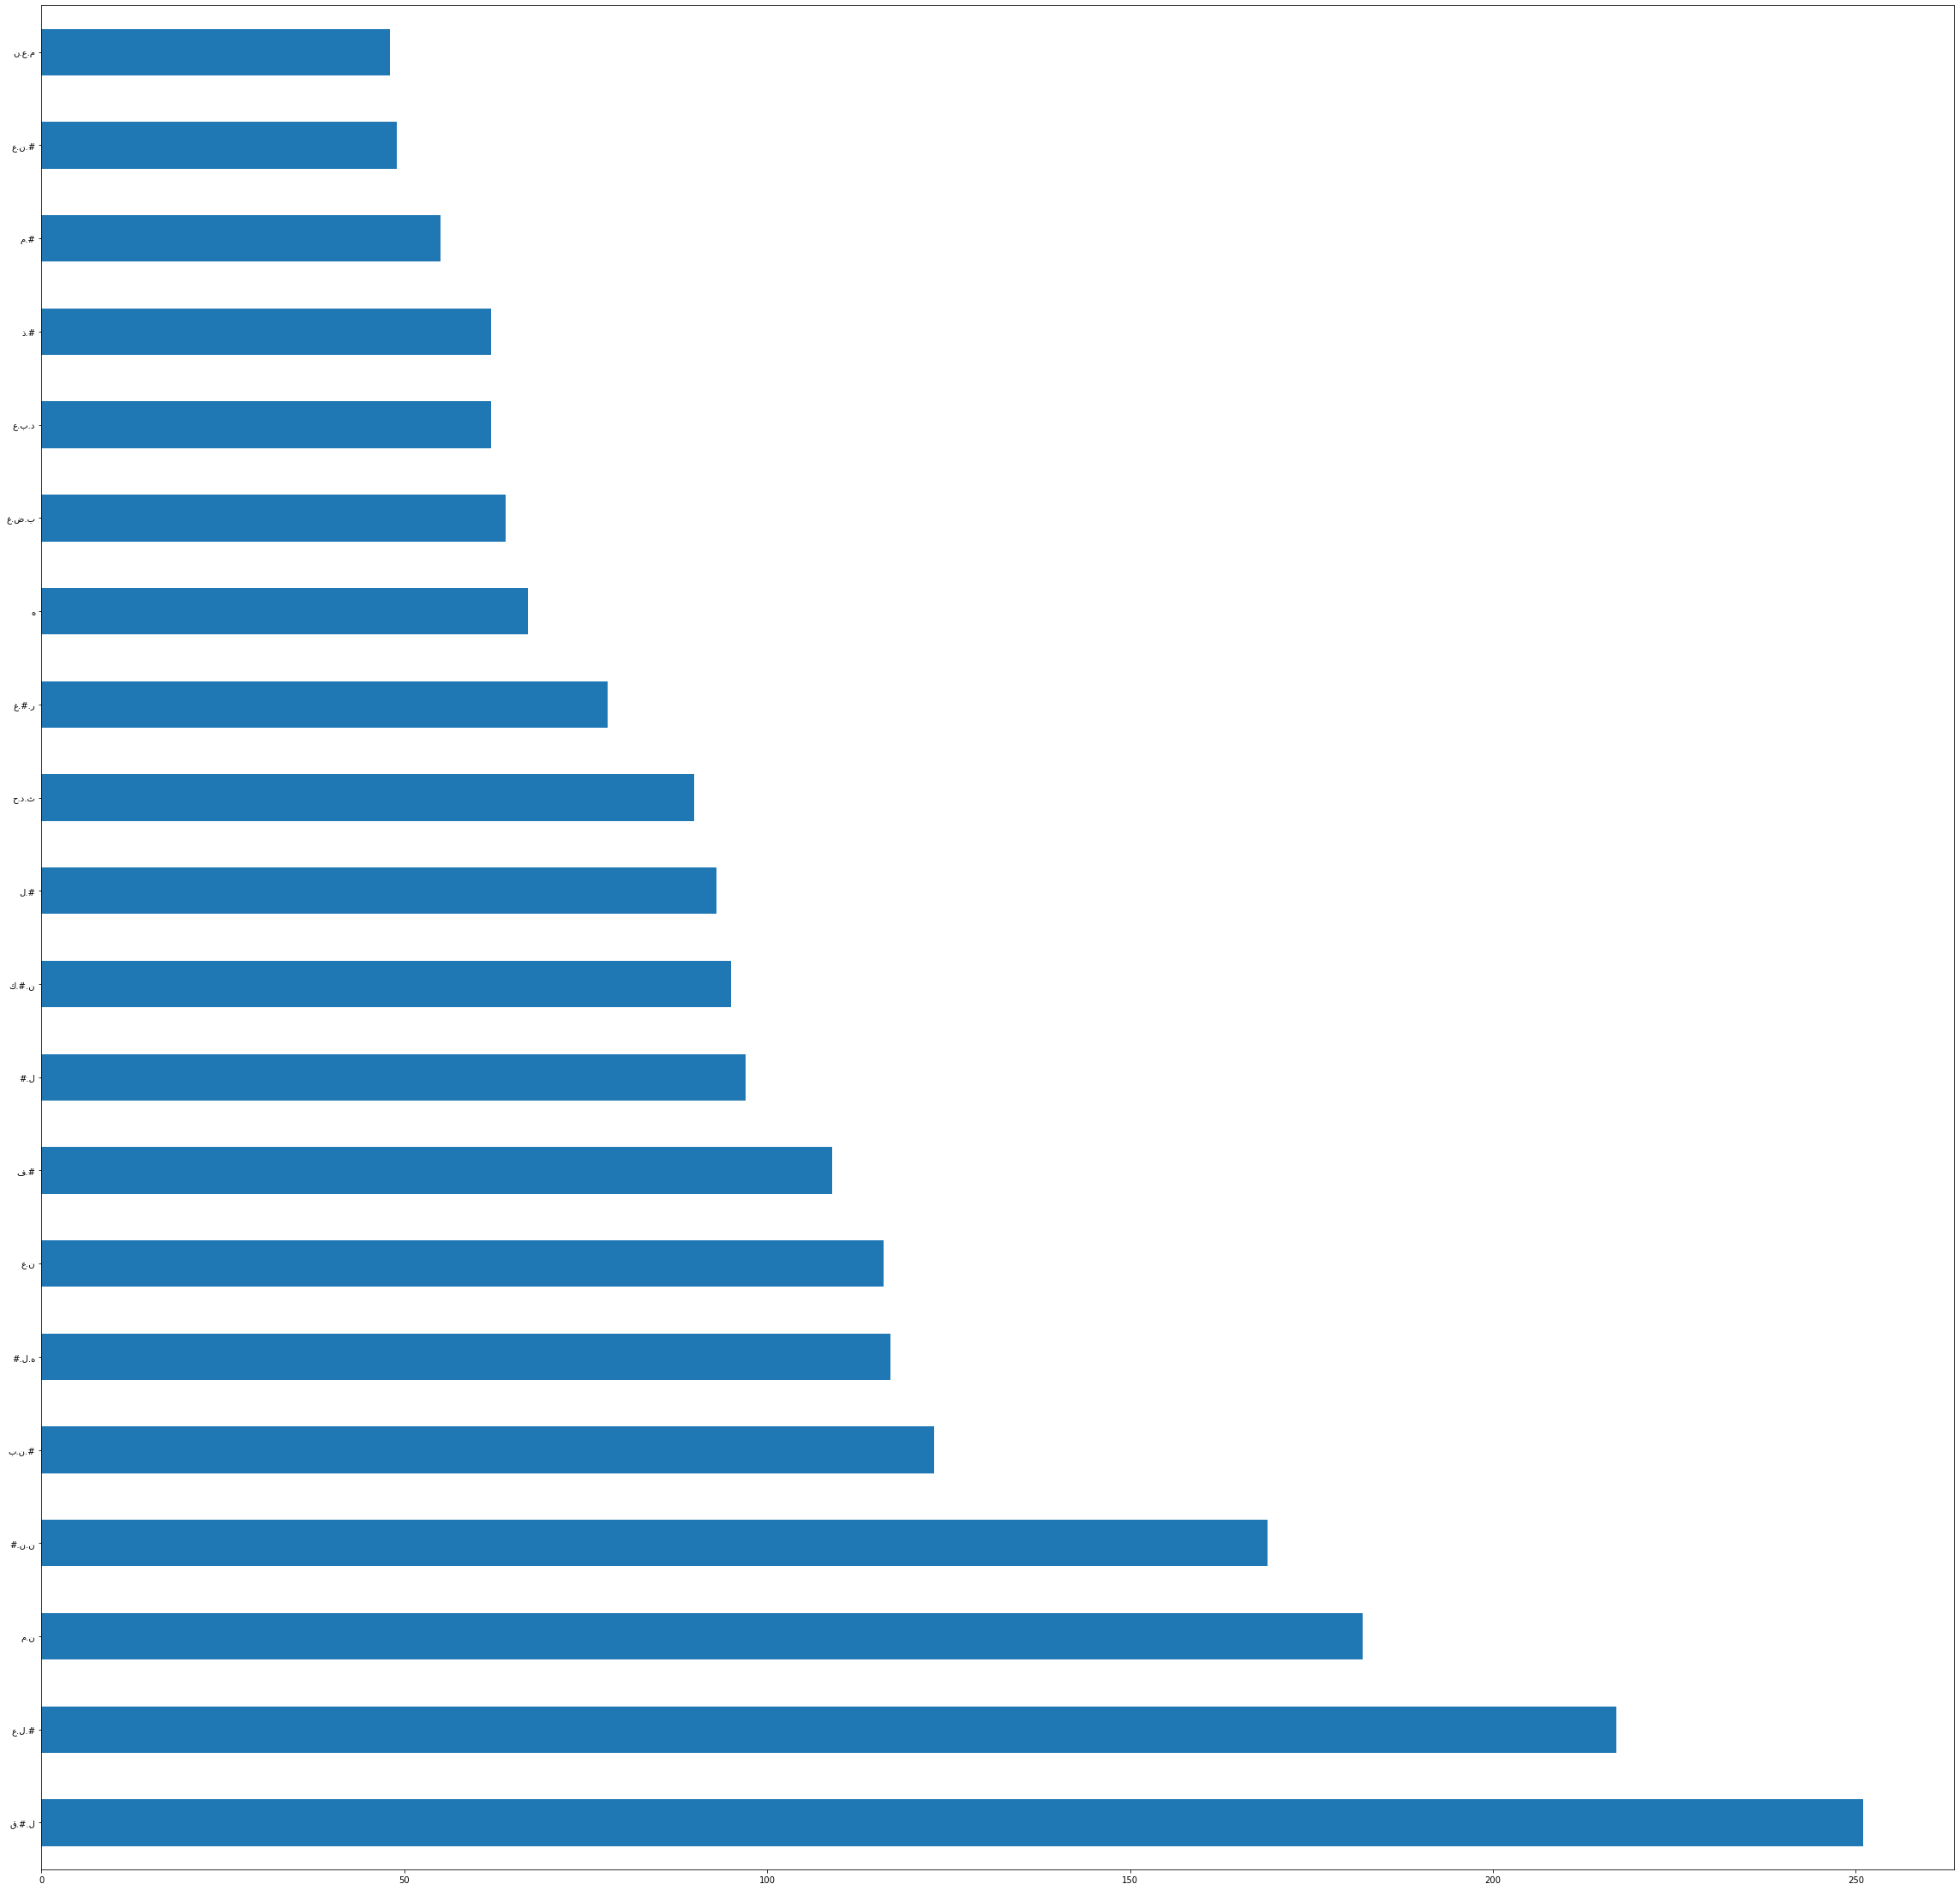

In [31]:
freq = pd.Series(frequency_analyzer(corpus["RootsList"]))[:20]

import matplotlib.pyplot as plt

freq.plot(kind="barh", figsize=(40 , 40))
# plt.show()
plt.savefig("./assets/barplot_roots.png")

## 4.2 Wordcloud of most frequent words

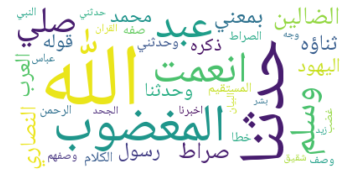

In [33]:
from collections import Counter

from wordcloud import WordCloud          # pip install wordcloud
import matplotlib.pyplot as plt          
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display   # pip install python-bidi

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(corpus["TokenizedMorphStopword"])
counts = {rtl(k):v for k, v in COUNTS.most_common(40)}



font_file = './assets/NotoNaskhArabic-Regular.ttf'
wordcloud = WordCloud(font_path=font_file, background_color="white").generate_from_frequencies(counts)
wordcloud.to_file("./assets/wordcloud_example.png")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
